In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Reading an Image
grey_img = cv2.imread("D:/OneDrive/Desktop/ananth/crt_img.jpeg") # 0: grey_sclae mode; default is 1:colour
# opencv stores images in BGR instead of RGB
img_clr = cv2.imread("D:\Downloads\File_000.jpeg",1)
img_clr = cv2.cvtColor(img_clr,cv2.COLOR_BGR2RGB) # will convert to RBG

In [ ]:
# Saving an Image
img_clr = cv2.cvtColor(img_clr,cv2.COLOR_RGB2BGR) # always rescale images(to their bitdepth) before saving
cv2.imwrite("trailimage.jpg",img_clr) # images are saved in BGR order

In [ ]:
#%matplotlib qt to get pop-up plots
plt.imshow(img_clr,cmap='gray')

In [ ]:
fig, axes = plt.subplots(2)
axes[0].imshow(img_clr)
axes[1].imshow(grey_img)
fig.tight_layout()

In [ ]:
# plotting using opencv
cv2.imshow("colour image",img_clr) # title,file name
cv2.imshow("anant image",grey_img)
cv2.waitKey(0)  # pop-ups will exsist until you close them
cv2.destroyAllWindows()

In [ ]:
# opening multiple images with os
import os
path = "testimage/"
for i,image in enumerate(os.listdir(path)):
    print(image)

In [ ]:
# resizing images
resized = cv2.resize(img_clr,None,fx=0.5,fy=0.5, interpolation =cv2.INTER_CUBIC)
cv2.imshow("resized",resized)
cv2.waitKey(0)
cv2.destroyAllWindows

In [ ]:
print(resized.shape)
print("Top Left",resized[0,0])

In [ ]:
# Splitting the channels
red = resized[:,:,0]
green = resized[:,:,1]
blue = resized[:,:,2]
print(red.shape)

In [ ]:
fig, axes = plt.subplots(1,3)
axes[0].imshow(red)
axes[1].imshow(green)
axes[2].imshow(blue)
fig.tight_layout()

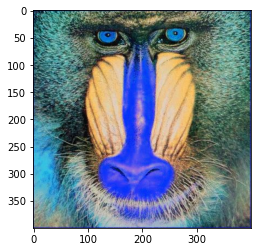

In [ ]:
# Unsharp mask
gray_clr = cv2.imread("D:/py_dev/PS-1/testimage/monke.jpg",1)
#gray_clr = cv2.cvtColor(gray_clr,cv2.COLOR_BGR2RGB)
plt.imshow(gray_clr)

In [ ]:
kernal = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
hpf_img = cv2.filter2D(gray_clr,ddepth = -1,kernel=kernal)
sharp = cv2.addWeighted(gray_clr,1.1,hpf_img,0.9,0)
plt.imshow(sharp)

In [ ]:
f_img = cv2.GaussianBlur(gray_clr,(3,3),1) # we can use gaussian filter to reduce gaussian noise
sharp1 = cv2.addWeighted(gray_clr,3,f_img,-2,0)
plt.imshow(sharp1)

In [ ]:
cv2.imshow("original image",gray_clr)
cv2.imshow("laplacian image",sharp)
cv2.imshow("gaussian image",sharp1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# salt and pepper noise + gaussian noise
def add_noise(img):
    row , col, depth = img.shape
    number_of_pixels_1 = np.random.randint(2500,5000)
    
    gauss =  np.random.normal(loc=0, scale=1, size=img.shape) # gaussian noise
    img = np.clip((img*(1 + gauss*0.1)/255.0),0,1)
    img = (img*255).astype(np.uint8)
    
    for i in range(number_of_pixels_1):
        y_coord=np.random.randint(0, row - 1)
        x_coord=np.random.randint(0, col - 1)
        img[y_coord][x_coord] = 255

    number_of_pixels_2 = np.random.randint(2500 , 5000)
    for i in range(number_of_pixels_2):
        y_coord=np.random.randint(0, row - 1)
        x_coord=np.random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
        
    noise_level = (number_of_pixels_1 +number_of_pixels_2)/(img.shape[1]*img.shape[0])
    return img, noise_level

def PSNR(noise,img):
    m,n,l = img.shape
    mse = (1/(m*n*l))*(np.sum((noise-img)**2))
    psnr = 10*np.log10(255**2 / mse)
    return psnr

In [ ]:
noise_img = gray_clr.copy()
noise_img,noise_level = add_noise(noise_img)
print(noise_level)

crt_img = cv2.medianBlur(noise_img,3) # median performs better in presence of salt and pepper noise

f_img = cv2.GaussianBlur(crt_img,(3,3),1) 
sharp1 = cv2.addWeighted(crt_img,3,f_img,-2,0) # improving edges

sharp2 = cv2.bilateralFilter(noise_img,3,15,30,borderType=cv2.BORDER_CONSTANT) # kernel size, SigmaColor, SigmaSpace

b_img = cv2.GaussianBlur(sharp2,(3,3),1)
sharp3 = cv2.addWeighted(sharp2,3,b_img,-2,0) # bilateral filters are edge preserving 

m_fig = cv2.medianBlur(noise_img,3)
sharp4 = cv2.bilateralFilter(m_fig, 3,15,30,borderType=cv2.BORDER_CONSTANT)

h_img = cv2.GaussianBlur(sharp4,(3,3),1)
sharp5 = cv2.addWeighted(sharp4,3,h_img,-2,0)

cv2.imshow("original image",gray_clr)
cv2.imshow("noisy image",noise_img)
print(f'noisy image PSNR:              {PSNR(noise_img,gray_clr)}')
cv2.imshow("Corrected image",crt_img)
print(f'median filter PSNR:            {PSNR(crt_img,gray_clr)}')
cv2.imshow("Improved+Corrected[median]",sharp1)
print(f'median+unsharp PSNR:           {PSNR(sharp1,gray_clr)}')
cv2.imshow("Bilateral filter",sharp2)
print(f'bilateral filter PSNR:         {PSNR(sharp2,gray_clr)}')
cv2.imshow("Bilateral+improved",sharp3)
print(f'Bilateral+unsharp PSNR:        {PSNR(sharp3,gray_clr)}')
cv2.imshow("Median+Bilateral",sharp4)
print(f'Medain+Bilateral PSNR:         {PSNR(sharp4,gray_clr)}')
cv2.imshow("Median+Bilateral+unsharp",sharp5)
print(f'Median+Bilateral+unsharp PSNR: {PSNR(sharp5,gray_clr)}')

cv2.waitKey(0)
cv2.destroyAllWindows()

0.0493
noisy image PSNR:              30.214948486275766
median filter PSNR:            29.658465995517123
median+unsharp PSNR:           28.933723553790102
bilateral filter PSNR:         30.371216855972133
Bilateral+unsharp PSNR:        28.13419559665288
Medain+Bilateral PSNR:         29.769986646382335
Median+Bilateral+unsharp PSNR: 29.17992966025195


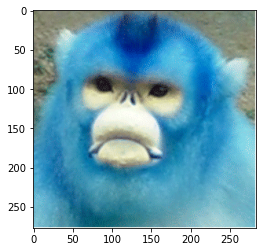

In [ ]:
monke_img = cv2.imread("D:/py_dev/PS-1/testimage/monke3.png")
plt.imshow(monke_img)

In [ ]:
noise_img = monke_img.copy()
noise_img,noise_level = add_noise(noise_img)

crt_img = cv2.fastNlMeansDenoisingColored(noise_img,None,10,10,7,21) #NlMeans denoising; good at reducing gaussian noise
cv2.imshow("monke.png",monke_img)
cv2.imshow("noisy image",noise_img)
cv2.imshow("corrected image",crt_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# roberts filter 
monke_img_gray = cv2.imread("D:/py_dev/PS-1/testimage/monke3.png",0)
monke_img_gray = cv2.GaussianBlur(monke_img_gray,(3,3),0)
monke_img_gray = monke_img_gray/255
robert_h = np.array([[1,0],[0,-1]])
robert_v = np.array([[0,1],[-1,0]])
mask_x = cv2.filter2D(monke_img_gray,-1,robert_h)
mask_y = cv2.filter2D(monke_img_gray,-1,robert_v)
mask = np.sqrt(mask_x**2+mask_y**2)
mask = (mask*255).astype(np.uint8)
cv2.imshow("roberts filter",mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# sobel filter
monke_img_gray = cv2.imread("D:/py_dev/PS-1/testimage/monke3.png",0)
monke_img_gray = cv2.GaussianBlur(monke_img_gray,(3,3),0)
monke_img_gray = monke_img_gray/255
sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
mask_x = cv2.filter2D(monke_img_gray,-1,sobel_x)
mask_y = cv2.filter2D(monke_img_gray,-1,sobel_y)
mask = np.sqrt(mask_x**2+mask_y**2)
mask = (mask*255).astype(np.uint8)
cv2.imshow("sobel filter",mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# canny edge detection
monke_img_gray = cv2.imread("D:/py_dev/PS-1/testimage/monke3.png",0)
monke_img_gray = cv2.GaussianBlur(monke_img_gray,(3,3),0)
mask = cv2.Canny(monke_img_gray,50,100)
cv2.imshow("canny edge detection",mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Fourier transform

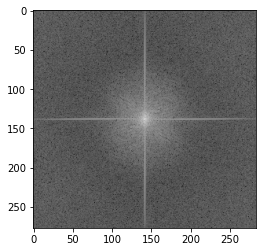

In [ ]:
monke_img = cv2.imread("D:/py_dev/PS-1/testimage/monke3.png",0)
# optimize for dft calculations
row,col = monke_img.shape
#opt_row = cv2.getOptimalDFTSize(row)
#opt_col = cv2.getOptimalDFTSize(col)
#opt_monke_img = np.zeros((opt_row,opt_col))
#opt_monke_img[:row,:col] = monke_img 

monke_dft = cv2.dft(np.float32(monke_img),flags = cv2.DFT_COMPLEX_OUTPUT)
monke_dft = np.fft.fftshift(monke_dft)
monke_fft_mag = 20*np.log(cv2.magnitude(monke_dft[:,:,0],monke_dft[:,:,1]))
plt.imshow(monke_fft_mag,cmap = 'gray')

In [ ]:
mask = np.ones((row,col,2))
center = [int(row/2),int(col/2)]
radius = 20
x,y = np.ogrid[:row,:col]
mask_area = (x-center[0])**2 + (y-center[1])**2 <= radius**2
mask[mask_area] = 0      # high pass filter

monke_dft = monke_dft*mask
#monke_fft_mag_filter = 20*np.log(cv2.magnitude(monke_dft[:,:,0],monke_dft[:,:,1])) # only for vizualization
#plt.imshow(monke_fft_mag_filter,cmap = 'gray')

monke_img_mask_fft = np.fft.ifftshift(monke_dft)
monke_img_mask = cv2.idft(monke_img_mask_fft)
monke_img_filtered = cv2.magnitude(monke_img_mask[:,:,0],monke_img_mask[:,:,1])
%matplotlib qt
fig, axes = plt.subplots(1,2,sharex=True,sharey=True)
axes[0].imshow(monke_img,cmap='gray')
axes[1].imshow(monke_img_filtered,cmap='gray')

In [ ]:
def fourier_transform(img):
    img_fft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    img_fft = np.fft.fftshift(img_fft)
    magnitude = 20*np.log(cv2.magnitude(img_fft[:,:,0],img_fft[:,:,1]))
    return img_fft, magnitude
def inverse_fourier_transform(img):
    img_ifft = np.fft.ifftshift(img)
    img_ifft = cv2.idft(img_ifft)
    img_ifft = cv2.magnitude(img_ifft[:,:,0],img_ifft[:,:,1])
    return img_ifft
def freq_filter(band = 'LowPass',size =(),radius1=20,radius2=20):
    if size == ():
        raise Expection("Improper Image size")
    else:
        if band == 'HighPass':
            mask = np.ones((size[0],size[1],2))
            center = [int(size[0]/2),int(size[1]/2)]
            x,y = np.ogrid[:size[0],:size[1]]
            mask_area = (x-center[0])**2 + (y-center[1])**2 <= radius1**2
            mask[mask_area] = 0
            return mask
        elif band=='LowPass':
            mask = np.zeros((size[0],size[1],2))
            center = [int(size[0]/2),int(size[1]/2)]
            x,y = np.ogrid[:size[0],:size[1]]
            mask_area = (x-center[0])**2 + (y-center[1])**2 <= radius1**2
            mask[mask_area] = 1
            return mask
        elif band=='BandPass':
            mask = np.zeros((size[0],size[1],2))
            center = [int(size[0]/2),int(size[1]/2)]
            x,y = np.ogrid[:size[0],:size[1]]
            mask_area = np.logical_and((x-center[0])**2+(y-center[1])**2-radius1**2 >=0,(x-center[0])**2+(y-center[1])**2-radius2**2 <=0)
            #mask_area = ((x-center[0])**2 + (y-center[1])**2 - radius1**2)*((x-center[0])**2 + (y-center[1])**2 - radius2**2)<0
            mask[mask_area] = 1
            return mask

In [ ]:
monke_img = cv2.imread("D:/py_dev/PS-1/testimage/monke.jpg",0)
monke_img_fft, mag1 = fourier_transform(monke_img)
mask = freq_filter(band='BandPass',size = monke_img.shape,radius1=20,radius2=100)
monke_img_fft *= mask
mag2 = 20*np.log(cv2.magnitude(monke_img_fft[:,:,0],monke_img_fft[:,:,1]))
monke_img_filtered = inverse_fourier_transform(monke_img_fft)
%matplotlib qt
fig,axes = plt.subplots(1,4,sharex=True,sharey=True)
axes[0].imshow(monke_img,cmap='gray')
axes[1].imshow(mag1,cmap='gray')
axes[2].imshow(mag2,cmap='gray')
axes[3].imshow(monke_img_filtered,cmap='gray')

<ipython-input-13-5c3bbe55f036>:5: RuntimeWarning: divide by zero encountered in log
  mag2 = 20*np.log(cv2.magnitude(monke_img_fft[:,:,0],monke_img_fft[:,:,1]))


In [ ]:
# histogram equilization
monke_img = cv2.imread("D:/py_dev/PS-1/testimage/monke3.png")
monke_img_lab = cv2.cvtColor(monke_img,cv2.COLOR_BGR2LAB)
monke_img_l,a,b = cv2.split(monke_img_lab) # l space is better for contrast improvement than gary space

monke_l_equ = cv2.equalizeHist(monke_img_l)
monke_img_lab = cv2.merge((monke_l_equ,a,b))
monke_img_equ = cv2.cvtColor(monke_img_lab,cv2.COLOR_LAB2BGR)
fig, axes = plt.subplots(3,1)
axes[0].hist(monke_img_l.flatten(),bins=100,range=(0,255))
axes[1].hist(monke_l_equ.flatten(),bins=100,range=(0,255))
axes[2].imshow(np.hstack((monke_img,monke_img_equ)))
fig.tight_layout()

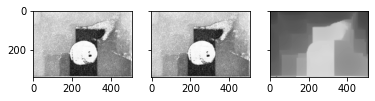

In [ ]:
# rolling ball background subtraction
from cv2_rolling_ball import subtract_background_rolling_ball
monke_img = cv2.imread("D:/py_dev/PS-1/testimage/ball.jpg",0)
radius = 100
final_img, background = subtract_background_rolling_ball(monke_img,radius,light_background=True,use_paraboloid=False,do_presmooth=True)
fig, axes = plt.subplots(1,3,sharex=True,sharey=True)
axes[0].imshow(monke_img,cmap='gray')
axes[1].imshow(final_img,cmap='gray')
axes[2].imshow(background,cmap='gray')